In [1]:
from os import listdir

import csv
import numpy as np
import glob

from PIL import Image
from matplotlib import pyplot as plt
from scipy import misc
from sklearn.decomposition import PCA
from sklearn import svm
import matplotlib.image as mpimg
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [2]:
# width and height of the input images
width = 96

# dictionary mapping integers types to words
types_dict = {
    0: 'bug',
    1: 'dark',
    2: 'dragon',
    3: 'electric',
    4: 'fairy',
    5: 'fighting',
    6: 'fire',
    7: 'flying',
    8: 'ghost',
    9: 'grass',
    10: 'ground',
    11: 'ice',
    12: 'normal',
    13: 'poison',
    14: 'psychic',
    15: 'rock',
    16: 'steel',
    17: 'water',
 }


In [3]:
# Function to plot images in n_col x n_row grid
def plot_images(images, n_col=3, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape((width, width, 3)),
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

In [4]:
# We make from the file types.csv a dictionaty mapping each filename to a pair of types, where -1
# on the second place represents that given pokemon has only one type.
types_file = open('types.csv', 'r')
types = {}
for line in types_file.readlines():
    args = line[:-1].split(',')
    types[args[0]] = (int(args[1]), int(args[2]) if len(args[2]) > 0 else -1)

In [5]:
# We load images from directories and build from them array of features x and array of target values y.
directories = ['5', '5b', '5bf', '5f', '6', '6b', '6bf', '6f', '4', 'off']
images = []
y_types = []
y_matrix = []
# inttype = 6  # fire
for dirc in directories:
    for fname in listdir('all/' + dirc + '/'):
        path = 'all/' + dirc + '/' + fname
        # Remove oppacity channel if there is any
        images.append(mpimg.imread(path)[:,:,:3])
        y_matrix.append([0] * 18)
        for t in types[fname]:
            if t != -1:
                y_matrix[-1][t] = 1
x = np.array(images)
x = x.reshape(x.shape[0], width * width * 3)
# y = np.array(target_vals)
y = np.array(y_matrix)
print(x.shape)
print(y.shape)

(4778, 27648)
(4778, 18)


In [6]:
# normalize data
X_ftrain = x[:-720 -556]
mean = np.mean(X_ftrain, axis=0)
X_ftrain -= mean
x_norm = x - mean

In [7]:
# Reduce dimensionality usinf PCA
pca = PCA(n_components=720)
pca.fit(X_ftrain)
transformed = pca.transform(x_norm)
print(pca.n_components_, sum(pca.explained_variance_ratio_))

720 0.902957846032


In [13]:
print(sum(pca.explained_variance_ratio_))
# print(pca.n_components_)
# ptype = 'fire'
# pokemon_dict = csv.DictReader(open('pokemon.csv', 'r'), delimiter=',')
# y = np.array([int(row['type1'] == ptype or row['type2'] == ptype) for row in pokemon_dict])[:720]
# print(sum(y))

0.970900148539


In [8]:
X_train = transformed[:-720 -556]
y_train = y[:-720 -556]

X_val = transformed[-720 - 556:-720]
y_val = y[-720 - 556:-720]

X_test = transformed[-720:]
y_test = y[-720:]

print(X_train.shape, X_val.shape, X_test.shape)

(3502, 720) (556, 720) (720, 720)


In [9]:
print(np.sum(y, axis=0)/x.shape[0])

[ 0.10213478  0.06320636  0.04960234  0.06278778  0.04332357  0.06069485
  0.07262453  0.13101716  0.04499791  0.11636668  0.08832147  0.05169527
  0.13331938  0.08099623  0.11657597  0.06739221  0.05609041  0.15885308]


In [77]:
X_ftrain, X_fval, y_ftrain, y_fval = train_test_split(x_norm[:-720], y[:-720], test_size=0.2, random_state=47)

In [14]:
t = 9

# Try various parameters for SVM
n_sv = []
for C in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e4]:
    print('{} &'.format(C))
    sv = []
    for gamma in [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
        clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X_train, y_train[:,t])
        sv = [].append(clf.n_support_)
        print("{:.2f}, {:.2f} &".format(clf.score(X_train, y_train[:,t]), clf.score(X_val, y_val[:,t])))
    print('\\')

# clf = OneVsRestClassifier(
#     svm.SVC(C=100, kernel='rbf', gamma=0.0009)
# )
# clf.fit(X_train, y_train)

# print(clf.score(X_train, y_train), clf.score(X_val, y_val))

# score = cross_val_score(clf , X_train, y_train, cv=5)
# print("Cross val score for SVC: {}".format(score))
# print("Mean cross val score: {}".format(score.mean()))


1e-05 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
\
0.0001 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
\
0.001 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
\
0.01 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
\
0.1 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
0.88, 0.89 &
\
1 &
0.88, 0.89 &
0.94, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
\
10 &
0.93, 0.11 &
0.99, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
\
100 &
0.98, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
\
10000.0 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
1.00, 0.89 &
\


flying 
flying ground 
dark grass 
water 
grass normal 
fire 
psychic 

flying psychic 
ice water 


fire ground 

normal 




ground 






normal 
water 
ground rock 
fire 




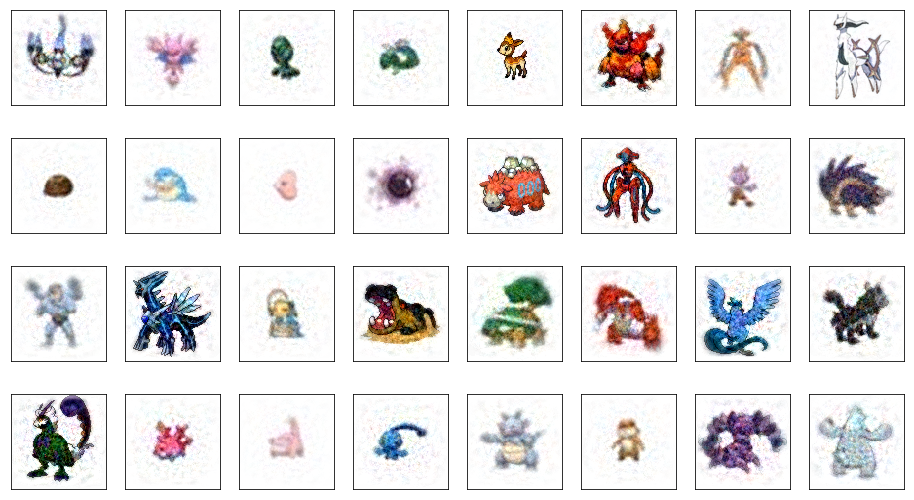

In [46]:
# Print predicted types with images of pokemons
predicted = clf.predict(X_val)
inv_val = pca.inverse_transform(X_val)
inv_val[inv_val < 0] = 0
inv_val[inv_val > 1] = 1
for p in predicted[:32]:
    res = ''
    for i in range(18):
        if p[i] == 1:
            res += types_dict[i] + ' '
    print(res)
plot_images(inv_val[:32], 8, 4)
plt.show()

# Log. regresia

In [18]:
from sklearn.linear_model import LogisticRegression

In [22]:
t = 9
for C in [1, 10, 100, 1e3, 1e4, 1e5]:
    clf = LogisticRegression(C=C, class_weight={0:1, 1:10000})
    clf.fit(X_train, y_train[:,t])
    print('C={}: {}, {}'.format(C, clf.score(X_train, y_train[:,t]), clf.score(X_val, y_val[:,t])))

C=1: 0.909127142287764, 0.8273381294964028
C=10: 0.936229573535273, 0.841726618705036
C=100: 0.9426066161817457, 0.841726618705036
C=1000.0: 0.9426066161817457, 0.8399280575539568
C=10000.0: 0.9445994420087684, 0.8381294964028777
C=100000.0: 0.9418094858509366, 0.8399280575539568


## Boosting

In [15]:
t = 9  # Type of classified pokemon
for d in range(5, 80, 5):
for d in range(10, 101, 5):
    clf = DecisionTreeClassifier(max_depth=d)
# clf = DecisionTreeClassifier(
#     max_depth=
# )
    clf.fit(X_train, y_train)

    print("n={}, d={}: {}, {}".format(n, d, clf.score(X_train, y_train), clf.score(X_val, y_val)))

n=45, d=10: 0.2897568752491032, 0.019784172661870502
n=45, d=15: 0.6325229174970107, 0.039568345323741004
n=45, d=20: 0.8632921482662416, 0.05755395683453238
n=45, d=25: 0.9713033080908728, 0.05755395683453238
n=45, d=30: 0.9984057393383818, 0.050359712230215826
n=45, d=35: 1.0, 0.05935251798561151
n=45, d=40: 1.0, 0.048561151079136694
n=45, d=45: 1.0, 0.050359712230215826
n=45, d=50: 1.0, 0.04316546762589928
n=45, d=55: 1.0, 0.050359712230215826
n=45, d=60: 1.0, 0.046762589928057555
n=45, d=65: 1.0, 0.050359712230215826
n=45, d=70: 1.0, 0.046762589928057555
n=45, d=75: 1.0, 0.046762589928057555
n=45, d=80: 1.0, 0.05935251798561151
n=45, d=85: 1.0, 0.05575539568345324
n=45, d=90: 1.0, 0.04136690647482014
n=45, d=95: 1.0, 0.050359712230215826
n=45, d=100: 1.0, 0.044964028776978415


In [79]:
clf = OneVsRestClassifier(
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=5),
        n_estimators=10,
#         learning_rate=0.5,
#         algorithm="SAMME"
    )
)
clf.fit(X_ftrain, y_ftrain)
print(clf.score(X_ftrain, y_ftrain), clf.score(X_fval, y_fval))

KeyboardInterrupt: 

In [19]:

# inv_val = pca.inverse_transform(X_val) + mean
# inv_val[inv_val < 0] = 0
# inv_val[inv_val > 1] = 1

proba_train = clf.predict_proba(X_train)
proba_val = clf.predict_proba(X_val)
# print(proba[32:64])
for i in range(len(X_val[:64])):
    print('%d: %d %.4f ## %d %.4f' % (i, y_train[i][t], proba_train[i][1], y_val[i][t], proba_val[i][1]))
#     for j in sorted(range(proba.shape[1]), key=lambda k: -proba[i][k])[:5]:
#         print('%s (%2f)' % (types_dict[j], proba[i][j]), end=' ')
#     print()

# plot_images(inv_val[:32], 8, 4)
# plt.show()

0: 0 0.4687 ## 0 0.4436
1: 0 0.4653 ## 0 0.4479
2: 0 0.4500 ## 0 0.4172
3: 1 0.5232 ## 1 0.4505
4: 0 0.4741 ## 0 0.4385
5: 1 0.5238 ## 1 0.4290
6: 0 0.4589 ## 0 0.4558
7: 0 0.4675 ## 0 0.3960
8: 0 0.4633 ## 0 0.4590
9: 1 0.5281 ## 0 0.4339
10: 0 0.4487 ## 1 0.4438
11: 0 0.4743 ## 0 0.4530
12: 0 0.4738 ## 0 0.4155
13: 0 0.4715 ## 0 0.4123
14: 1 0.5239 ## 0 0.4377
15: 0 0.4751 ## 1 0.4454
16: 0 0.4370 ## 0 0.4248
17: 0 0.4749 ## 0 0.4384
18: 0 0.4491 ## 0 0.4597
19: 0 0.4741 ## 0 0.4535
20: 0 0.4644 ## 0 0.4706
21: 0 0.4609 ## 0 0.4364
22: 0 0.4705 ## 0 0.4338
23: 0 0.4707 ## 0 0.4416
24: 0 0.4561 ## 0 0.4623
25: 0 0.4548 ## 0 0.4261
26: 0 0.4604 ## 0 0.4314
27: 0 0.4760 ## 0 0.4245
28: 0 0.4731 ## 0 0.4211
29: 0 0.4686 ## 0 0.4212
30: 0 0.4752 ## 0 0.4247
31: 0 0.4599 ## 0 0.4348
32: 1 0.5243 ## 1 0.4519
33: 0 0.4706 ## 0 0.3960
34: 0 0.4540 ## 0 0.4226
35: 0 0.4728 ## 0 0.4321
36: 0 0.4730 ## 0 0.4563
37: 0 0.4691 ## 0 0.4369
38: 1 0.5270 ## 0 0.4444
39: 0 0.4325 ## 0 0.4497
40: 0 0.46

In [33]:
for n in range(50, 100, 5):
    clf = OneVsRestClassifier(
        AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2),
            n_estimators=n,
        #     learning_rate=1.5,
        #     algorithm="SAMME"
        )
    )
    clf.fit(X_trn, y_trn)
    print("Number of estimators: {}".format(n))
    print("Testing and validating error: {}, {}".format(clf.score(X_trn, y_trn), clf.score(X_val, y_val)))

KeyboardInterrupt: 

In [28]:
clf = OneVsRestClassifier(
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2),
        n_estimators=105,
    )
)
clf.fit(X_train, y_train)
print("Number of estimators: {}".format(n))
print("Testing and validating error: {}, {}".format(clf.score(X_train, y_train), clf.score(X_val, y_val)))

Number of estimators: 120
Testing and validating error: 1.0, 1.0


In [23]:
print(clf.score(X_train, y_train), clf.score(X_val, y_val))

0.92984496124 0.93023255814


In [19]:
print(bdt.score(X_test, y_test))

0.888679245283


51


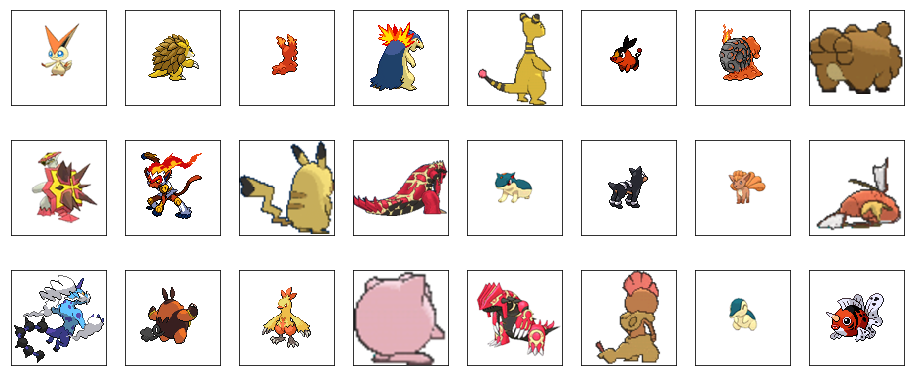

In [31]:
predicted = clf.predict(X_val)
miss = [X_val[i] for i in range(len(X_val)) if predicted[i] != y_val[i]]
print(len(miss))
plot_images((miss + mean)[:24], 8, 3)
plt.show()

In [15]:
print(sum(miss))

271


In [52]:
for i, ptype in types_dict.items():
    pokemon_dict = csv.DictReader(open('pokemon.csv', 'r'), delimiter=',')
    y = np.array([int(row['type1'] == ptype or row['type2'] == ptype) for row in pokemon_dict])[:720]
    X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)
    clf = svm.SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    print("Type: {} =============".format(ptype))
    score = cross_val_score(clf , X_train, y_train, cv=5)
    print("Cross val score for SVC: {}".format(score))
    print("Mean cross val score: {}".format(score.mean()))

Type: bug =============
Cross val score for SVC: [ 0.90517241  0.90434783  0.90434783  0.90434783  0.90434783]
Mean cross val score: 0.9045127436281859
Type: dark =============
Cross val score for SVC: [ 0.92241379  0.93043478  0.93043478  0.93043478  0.93043478]
Mean cross val score: 0.9288305847076461
Type: dragon =============
Cross val score for SVC: [ 0.93965517  0.93965517  0.93913043  0.93913043  0.94736842]
Mean cross val score: 0.9409879270890871
Type: electric =============
Cross val score for SVC: [ 0.93103448  0.93103448  0.93913043  0.93913043  0.93859649]
Mean cross val score: 0.9357852652621059
Type: fairy =============
Cross val score for SVC: [ 0.94827586  0.94827586  0.94827586  0.95614035  0.95614035]
Mean cross val score: 0.9514216575922566
Type: fighting =============
Cross val score for SVC: [ 0.93965517  0.93965517  0.94782609  0.94782609  0.94736842]
Mean cross val score: 0.9444661879586522
Type: fire =============
Cross val score for SVC: [ 0.92241379  0.922413

KeyboardInterrupt: 